In [2]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Basic

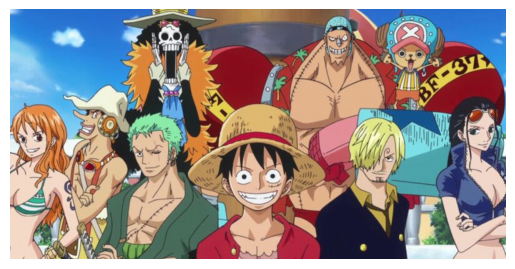

In [3]:
# Read và display
img = cv2.imread('ATV_Training/2_OpenCV/data/OP.jpg')
# cv2.imshow('Image display', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

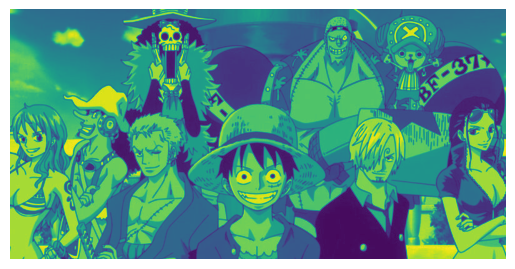

In [4]:
# Chuyển ảnh thành gray scale
img_gray = cv2.imread('ATV_Training/2_OpenCV/data/OP.jpg', cv2.IMREAD_GRAYSCALE)
# img_gray = cv2.cvtColor(img, cv2.RGB2GRAY)
plt.imshow(img_gray)
plt.axis('off')
plt.show()

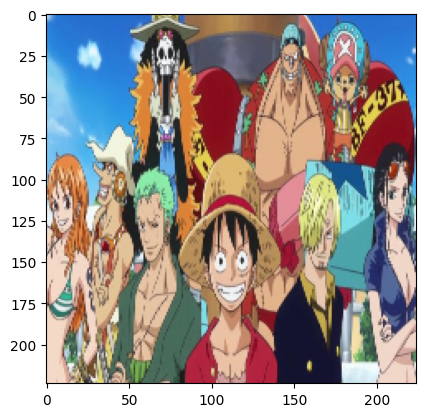

In [5]:
# Resize image
img_resized = cv2.resize(img_rgb, (224, 224))
plt.imshow(img_resized)
# plt.axis('off')
plt.show()

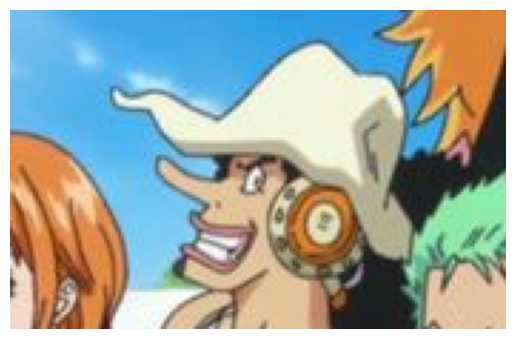

In [6]:
#Croping image
cropped = img_rgb[110:222, 50:224]
plt.imshow(cropped)
plt.axis('off')
plt.show()

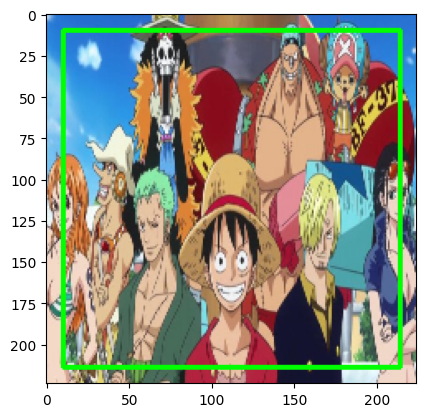

In [7]:
shape = cv2.rectangle(img_resized, (10,10), (214,214), (0,255,0),2)
plt.imshow(shape)
plt.show()


### 2.Arithmetic Operation

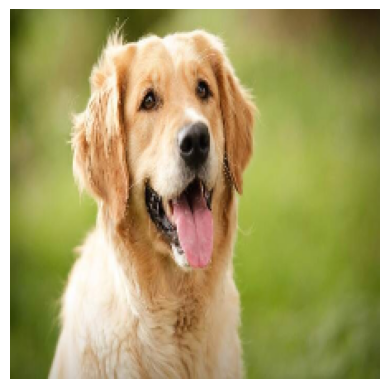

In [15]:
img2 = cv2.imread('ATV_Training/2_OpenCV/data/dog.jpg')
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2_resized = cv2.resize(img2_rgb, (224,224))
plt.imshow(img2_resized)
plt.axis('off')
plt.show()

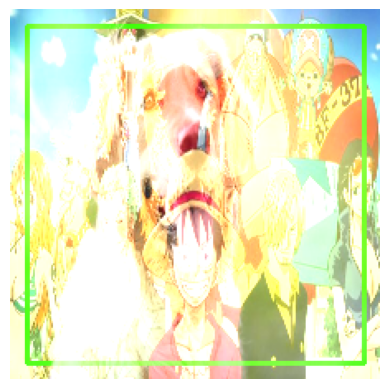

In [18]:
# Add 2 image
added_img = cv2.add(img_resized, img2_resized)
plt.imshow(added_img)
plt.axis('off')
plt.show()

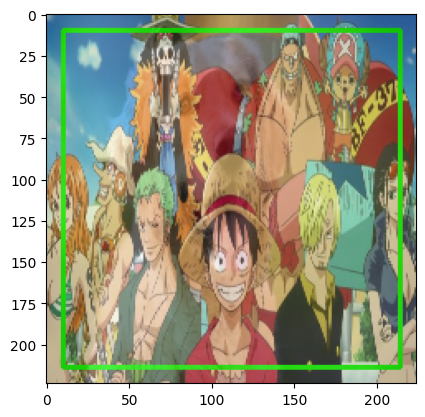

In [21]:
# Blended 2 image: Khác với add 2 image ở chỗ có thêm weight, add 2 image chỉ cộng các pixel 1 cách element-wise với trọng số 0.5-0.5
blended = cv2.addWeighted(img_resized, 0.7, img2_resized, 0.3, 0)
plt.imshow(blended)

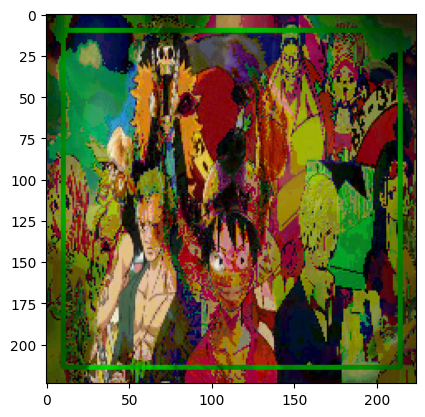

In [ ]:
# Bit-wise operation
bitwise_and = cv2.bitwise_and(img_resized, img2_resized) # Giữ phần intersection màu trắng
plt.imshow(bitwise_and) 

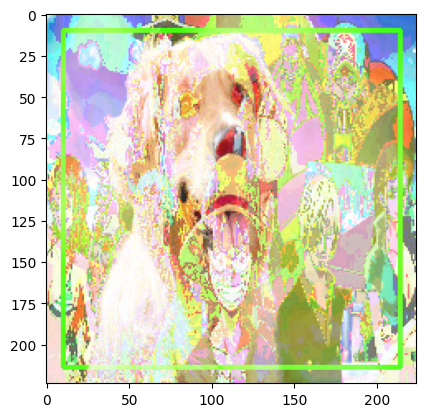

In [ ]:
bitwise_or = cv2.bitwise_or(img_resized, img2_resized) # Union phần màu trắng của 2 ảnh
plt.imshow(bitwise_or)

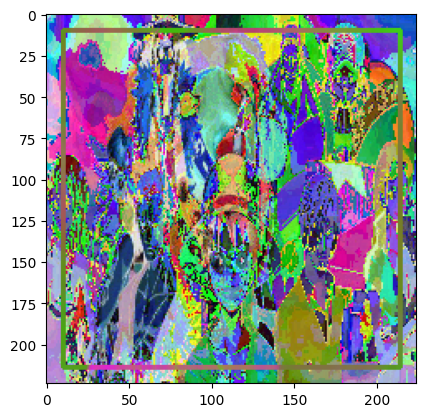

In [25]:
bitwise_xor = cv2.bitwise_xor(img_resized, img2_resized) # Giữ lại phần non-overlapping màu trắng của 2 ảnh
plt.imshow(bitwise_xor)

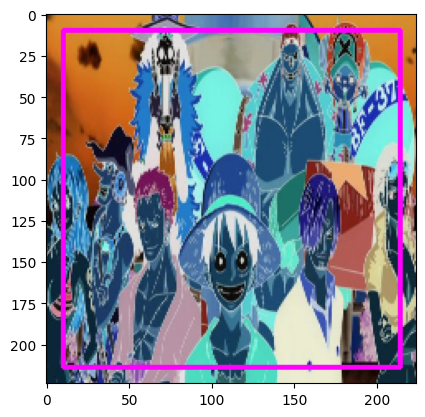

In [ ]:
bitwise_not = cv2.bitwise_not(img_resized, img2_resized) # Chuyển white -> black, black -> white
plt.imshow(bitwise_not)

### 3. Performance Measurement and Improvement Techniques

In [31]:
# Tính time execute
t1 = cv2.getTickCount()
img_add = cv2.add(img_resized, img2_resized)
t2 = cv2.getTickCount()
time = (t2-t1)/cv2.getTickFrequency()
print(time)

0.000423


Để cải thiện hiệu suẩt của OpenCV ta có thể sử dụng hàm cv2.setUseOptimized(True)

In [40]:
# Ví dụ so sánh hiệu suât
import time

cv2.setUseOptimized(False)
t1 = time.time()
for _ in range(1000):
    img_add = cv2.add(img_resized, img2_resized)
time_taken1 = time.time() - t1

cv2.setUseOptimized(True)
t2 = time.time()
for _ in range(1000):
    img_add = cv2.add(img_resized, img2_resized)
time_taken2 = time.time() - t2
print(f'Not Optimize: {time_taken1:.4f}, Optimized: {time_taken2:.4f}')


Not Optimize: 0.0093, Optimized: 0.0072
